Author: Jonathan Ibifubara Pollyn                                                                                          
Course: DSC-540                                                                                                           
Assignment: Image Classifier                                                                                                
Description: tasked to build an image classifier for the MNIST dataset of handwritten numbers, implementing the k-nearest neighbors (k-NN) algorithm.

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [11]:
import sys

!$sys.executable -m pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=75c209ae22a1a6160ca5293c5d01ca5c40e5985c0b90b5cce5fb567c4ddde787
  Stored in directory: c:\users\jonathan pollyn\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


In [3]:
#loading the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
import math

In [4]:
#Loading MNIST Dataset predictor and reponse variable
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
#Printing the data shapes
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


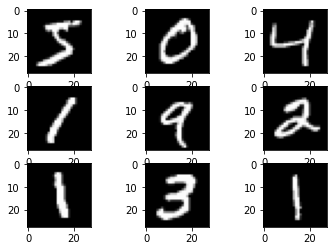

In [6]:
#Plotting the training dataset 
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

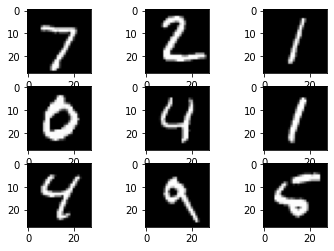

In [7]:
#Plotting the test dataset 
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
#Convert the 2D data into 1D data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [9]:
#Convert the target variable to a one-hot vector
label_binar = LabelBinarizer()
label_binar.fit(range(10))
y_train = label_binar.transform(y_train)
y_test = label_binar.transform(y_test)

In [10]:
#Create the model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=784))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Train the model to check for the final accuracy
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=40, 
batch_size=32)
score = model.evaluate(x_test, y_test)
print('Accuracy: {0:.2f}%'.format(score[1]*100))

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5805 - acc: 0.7386 - val_loss: 0.5162 - val_acc: 0.8575
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3997 - acc: 0.8906 - val_loss: 0.3258 - val_acc: 0.9086
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2940 - acc: 0.9184 - val_loss: 0.2522 - val_acc: 0.9287
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2461 - acc: 0.9314 - val_loss: 0.2571 - val_acc: 0.9265
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2169 - acc: 0.9393 - val_loss: 0.2124 - val_acc: 0.9426
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1971 - acc: 0.9450 - val_loss: 0.2095 - val_acc: 0.9436
Epoch 7/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1772 - acc: 0.9504 - val_loss: 0.1919 - val_acc: 0.9474
Epoch 8/40
1875/1875 [==============================] - 4s 2ms

In [12]:
distance.euclidean(x_test[0], x_train[0])   

2204.126357539422

In [13]:
distance.euclidean(x_test[1], x_train[1])   

2536.5214369289292

In [14]:
distance.euclidean(x_test[2], x_train[2])   

1909.3464850571256

In [15]:
distance.euclidean(x_test[3], x_train[3])   

2942.6883966876276

In [16]:
distance.euclidean(x_test[4], x_train[4])   

2154.393882278726

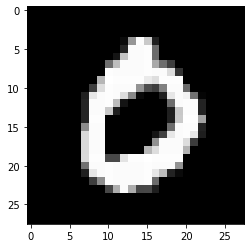

Prediction: 0


In [17]:
#Ploting some test images
image = 3
plt.imshow(x_test[image].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()
y_pred = model.predict(x_test)
print('Prediction: {0}'.format(np.argmax(y_pred[image])))

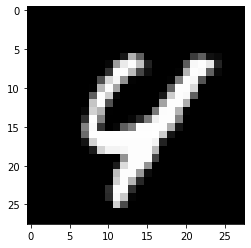

Prediction: 8


In [18]:
#Testing an incorrect prediction
incorrect_indices = np.nonzero(np.argmax(y_pred,axis=1) != np.argmax(y_test,axis=1))[0]
image = 4
plt.imshow(x_test[incorrect_indices[image]].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Prediction: {0}'.format(np.argmax(y_pred[incorrect_indices[image]])))

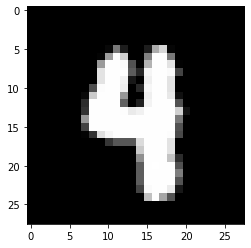

Prediction: 9


In [19]:
#Testing an incorrect prediction
incorrect_indices = np.nonzero(np.argmax(y_pred,axis=1) != np.argmax(y_test,axis=1))[0]
image = 9
plt.imshow(x_test[incorrect_indices[image]].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Prediction: {0}'.format(np.argmax(y_pred[incorrect_indices[image]])))

In [20]:
#Obtaining the k-Nearest Neighbor
accuracies = []

for k in range(1, 30, 2):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)

    # evaluate the model and update the accuracies list
    score = model.score(x_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=96.91%
k=3, accuracy=96.95%
k=5, accuracy=96.60%
k=7, accuracy=96.55%
k=9, accuracy=96.19%
k=11, accuracy=96.10%
k=13, accuracy=95.85%
k=15, accuracy=95.73%
k=17, accuracy=95.71%
k=19, accuracy=95.64%
k=21, accuracy=95.57%
k=23, accuracy=95.54%
k=25, accuracy=95.33%
k=27, accuracy=95.20%
k=29, accuracy=95.08%
